# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = url + "&appid=" + weather_api_key + "&q=Chicago" + "&units=metric"

city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1680092458,
 'id': 4887398,
 'main': {'feels_like': -1.1,
          'humidity': 60,
          'pressure': 1020,
          'temp': 3.8,
          'temp_max': 4.54,
          'temp_min': 1.79},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 2018264,
         'sunrise': 1680089927,
         'sunset': 1680135108,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'gust': 10.29, 'speed': 7.2}}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | kalomo
City not found. Skipping...
Processing Record 5 of Set 1 | liverpool
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ilhabela
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | sioux lookout
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | sanmihaiu roman
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | sicuani
Processing Record 21 of 

Processing Record 34 of Set 4 | tena
Processing Record 35 of Set 4 | thinadhoo
Processing Record 36 of Set 4 | andenes
Processing Record 37 of Set 4 | jiuquan
Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | pangnirtung
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | barcelos
Processing Record 42 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | ossora
Processing Record 45 of Set 4 | sindou
Processing Record 46 of Set 4 | pilar
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | itupiranga
Processing Record 49 of Set 4 | roros
Processing Record 0 of Set 5 | oussouye
Processing Record 1 of Set 5 | valenca do piaui
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | rafaela
Processing Record 4 of Set 5 | grimshaw
Processing Record 5 of Set 5 | bonavista
Processing Record 6 of Set 5 | half moon bay
Processing Record 7 of Set 

Processing Record 26 of Set 8 | doha
Processing Record 27 of Set 8 | maningrida
Processing Record 28 of Set 8 | stephenville
Processing Record 29 of Set 8 | derzhavinsk
Processing Record 30 of Set 8 | lima
Processing Record 31 of Set 8 | ulladulla
Processing Record 32 of Set 8 | waitati
Processing Record 33 of Set 8 | kolobovo
Processing Record 34 of Set 8 | verkhnevilyuysk
Processing Record 35 of Set 8 | goiatuba
Processing Record 36 of Set 8 | axim
Processing Record 37 of Set 8 | isiro
Processing Record 38 of Set 8 | giera
Processing Record 39 of Set 8 | malkapur
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | birin
Processing Record 42 of Set 8 | wolgast
Processing Record 43 of Set 8 | iqaluit
Processing Record 44 of Set 8 | grindavik
Processing Record 45 of Set 8 | wangaratta
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | bengkulu
Processing Record 48 of Set 8 | naron
Processing Record 49 of Set 8 | vila franca do campo
Processi

Processing Record 12 of Set 12 | namibe
Processing Record 13 of Set 12 | soritor
Processing Record 14 of Set 12 | arzgir
Processing Record 15 of Set 12 | sept-iles
Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | ijaki
City not found. Skipping...
Processing Record 18 of Set 12 | angoche
Processing Record 19 of Set 12 | kaeo
Processing Record 20 of Set 12 | canavieiras
Processing Record 21 of Set 12 | jurado
Processing Record 22 of Set 12 | strelka
Processing Record 23 of Set 12 | siljan
Processing Record 24 of Set 12 | canto do buriti
Processing Record 25 of Set 12 | hamina
Processing Record 26 of Set 12 | hamburg
Processing Record 27 of Set 12 | ekhabi
Processing Record 28 of Set 12 | atherton
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | poieni
Processing Record 31 of Set 12 | rio gallegos
Processing Record 32 of Set 12 | szczecinek
Processing Record 33 of Set 12 | saint-ambroise
Processing Record 34 of Set 12 | esterhazy
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-11.71,72,20,5.14,CA,1680092871
1,san patricio,28.0170,-97.5169,17.13,54,95,3.62,US,1680092871
2,bluff,-46.6000,168.3333,5.45,68,20,7.58,NZ,1680092872
3,liverpool,53.4106,-2.9779,14.05,86,75,6.69,GB,1680092811
4,atuona,-9.8000,-139.0333,26.91,80,22,6.77,PF,1680092873


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-11.71,72,20,5.14,CA,1680092871
1,san patricio,28.0170,-97.5169,17.13,54,95,3.62,US,1680092871
2,bluff,-46.6000,168.3333,5.45,68,20,7.58,NZ,1680092872
3,liverpool,53.4106,-2.9779,14.05,86,75,6.69,GB,1680092811
4,atuona,-9.8000,-139.0333,26.91,80,22,6.77,PF,1680092873


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

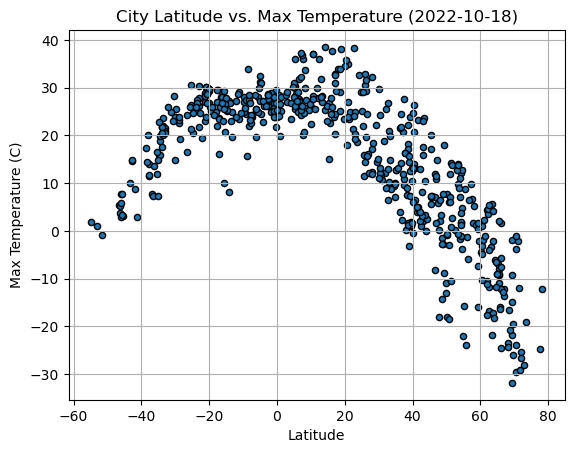

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", facecolors="blue", edgecolors="black", xlabel="Latitude", ylabel="Max Temperature (C)", title="City Latitude vs. Max Temperature (2022-10-18)")

# Incorporate the other graph properties
#plt.title("City Latitude vs. Max Temperature (2022-10-18)")
#plt.xlabel("Latitude")
#plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

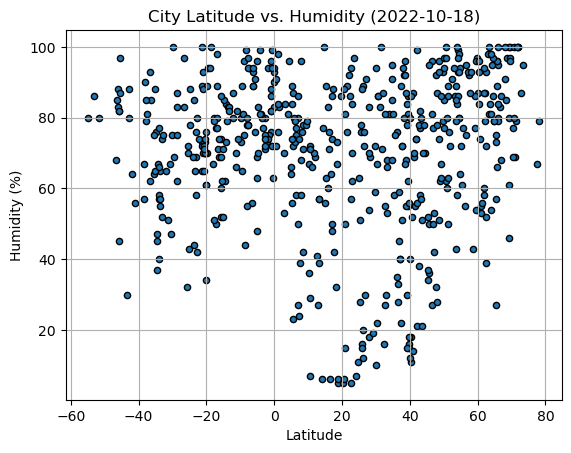

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", facecolors="blue", edgecolors="black", xlabel="Latitude", ylabel="Humidity (%)", title="City Latitude vs. Humidity (2022-10-18)")

# Incorporate the other graph properties
plt.title = ("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel = ("Latitude")
plt.ylabel = ("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

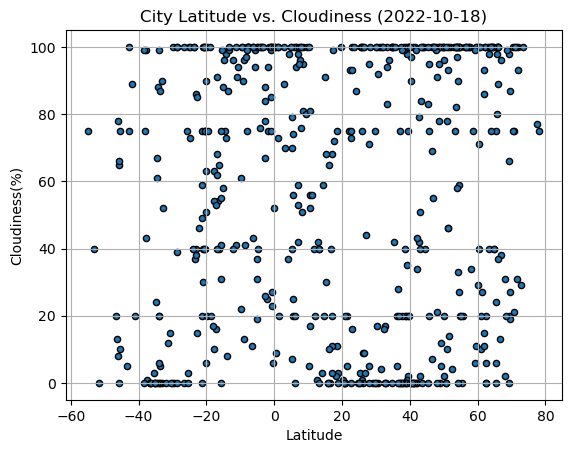

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", facecolors="blue", edgecolors="black", xlabel="Latitude", ylabel="Cloudiness(%)", title="City Latitude vs. Cloudiness (2022-10-18)")

# Incorporate the other graph properties
#plt.title("City Latitude vs. Cloudiness (2022-10-18)")
#plt.xlabel=("Latitude")
#plt.ylabel=("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

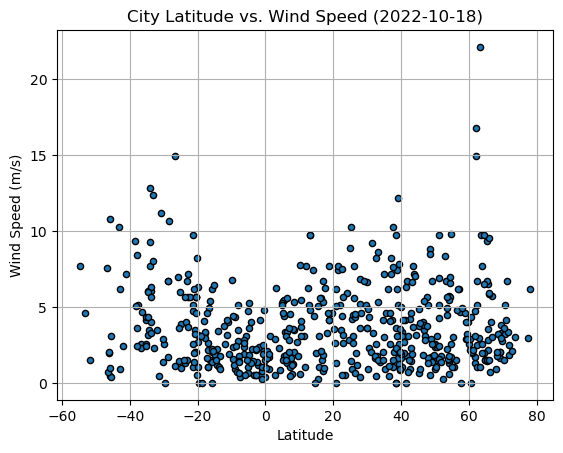

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", facecolors="blue", edgecolors="black", xlabel="Latitude", ylabel="Wind Speed (m/s)", title="City Latitude vs. Wind Speed (2022-10-18)")

# Incorporate the other graph properties
plt.title = ("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel = ("Latitude")
plt.ylabel = ("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-11.71,72,20,5.14,CA,1680092871
1,san patricio,28.0170,-97.5169,17.13,54,95,3.62,US,1680092871
3,liverpool,53.4106,-2.9779,14.05,86,75,6.69,GB,1680092811
9,nanortalik,60.1432,-45.2371,-4.51,87,29,2.54,GL,1680092879
10,sioux lookout,50.1001,-91.9170,-17.96,85,20,2.57,CA,1680092879


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bluff,-46.6000,168.3333,5.45,68,20,7.58,NZ,1680092872
4,atuona,-9.8000,-139.0333,26.91,80,22,6.77,PF,1680092873
5,hermanus,-34.4187,19.2345,18.78,67,88,3.50,ZA,1680092874
6,ilhabela,-23.7781,-45.3581,25.23,85,100,1.33,BR,1680092875
7,constitucion,-35.3333,-72.4167,11.99,64,0,4.15,CL,1680092876


###  Temperature vs. Latitude Linear Regression Plot

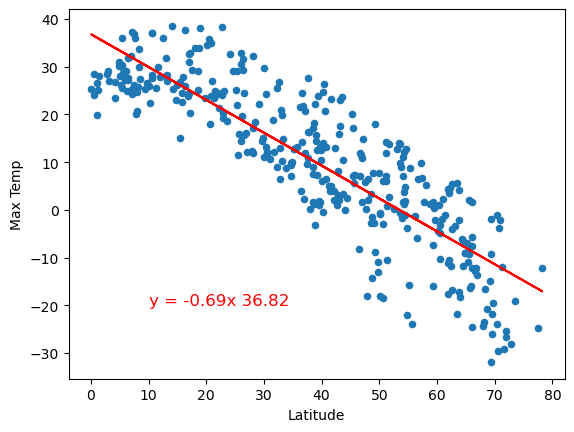

y = -0.69x 36.82
The r-value is: -0.8649718768475488


In [42]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Max Temp")

x_values = northern_hemi_df.loc[:,"Lat"]
y_values = northern_hemi_df.loc[:,"Max Temp"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (10,-20), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

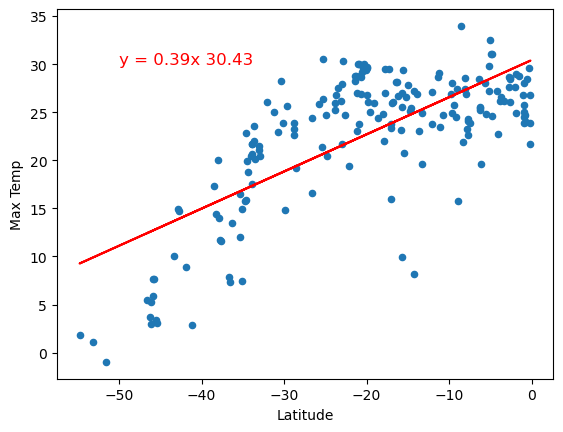

y = 0.39x 30.43
The r-value is: 0.7185068897613401


In [45]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Max Temp")

x_values = southern_hemi_df.loc[:,"Lat"]
y_values = southern_hemi_df.loc[:,"Max Temp"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (-50,30), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a negative correlation between the latitude and max temp.  In the Southern Hemisphere, there is a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

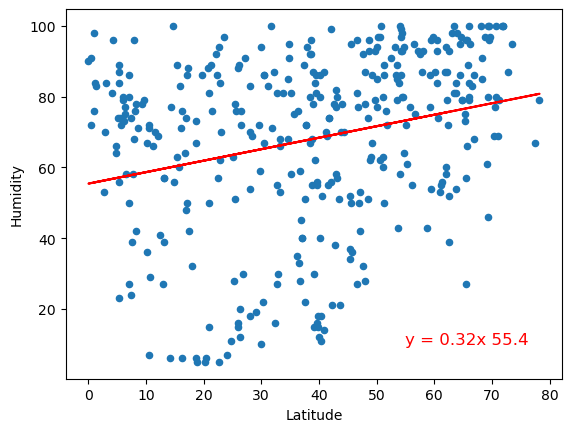

y = 0.32x 55.4
The r-value is: 0.26493798246062805


In [53]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Humidity")

x_values = northern_hemi_df.loc[:,"Lat"]
y_values = northern_hemi_df.loc[:,"Humidity"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (55,10), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

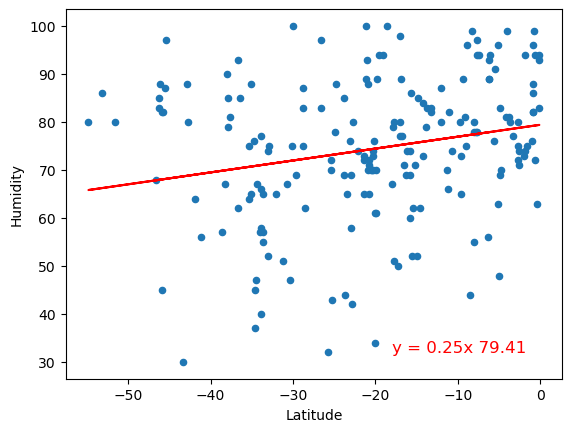

y = 0.25x 79.41
The r-value is: 0.22518122465829438


In [47]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Humidity")

x_values = southern_hemi_df.loc[:,"Lat"]
y_values = southern_hemi_df.loc[:,"Humidity"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (-18,32), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres there is a weak positive, almost no, correlation between the latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

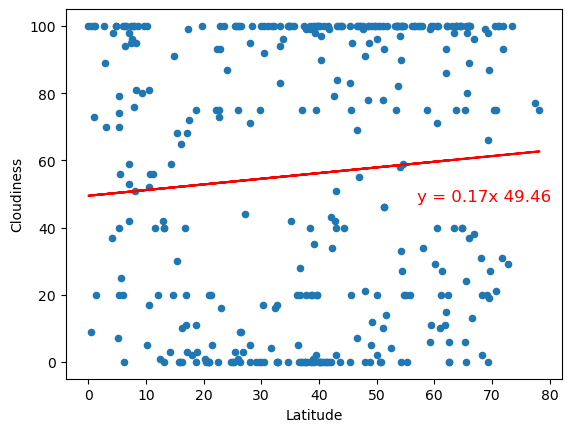

y = 0.17x 49.46
The r-value is: 0.08387594998506598


In [52]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Cloudiness")

x_values = northern_hemi_df.loc[:,"Lat"]
y_values = northern_hemi_df.loc[:,"Cloudiness"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (57,48), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

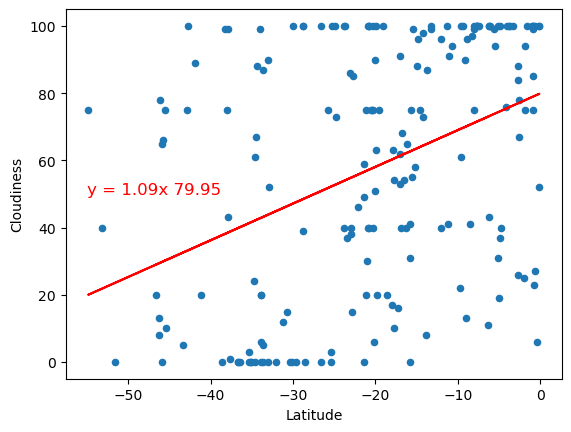

y = 1.09x 79.95
The r-value is: 0.39704402941548356


In [51]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Cloudiness")

x_values = southern_hemi_df.loc[:,"Lat"]
y_values = southern_hemi_df.loc[:,"Cloudiness"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (-55,50), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern and Southern Hemispheres, there is a weak positive correlation between latitude in cloudiness.  The Northern Hemisphere is very weak; almost no correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

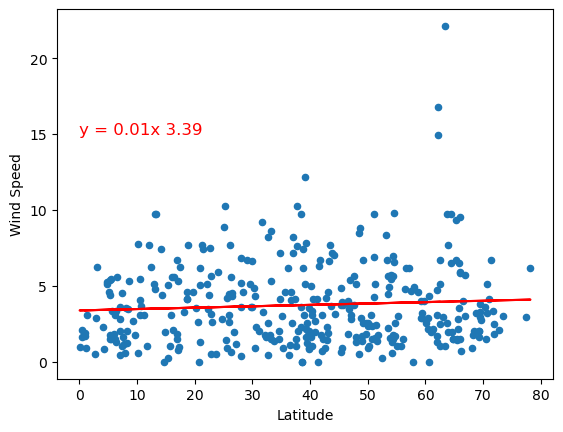

y = 0.01x 3.39
The r-value is: 0.06725750422569872


In [54]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Wind Speed")

x_values = northern_hemi_df.loc[:,"Lat"]
y_values = northern_hemi_df.loc[:,"Wind Speed"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (0,15), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

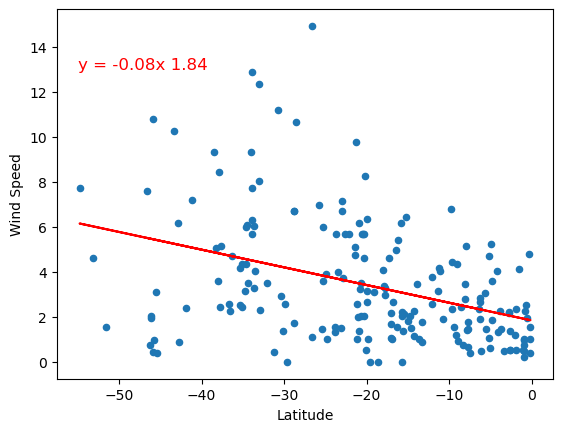

y = -0.08x 1.84
The r-value is: -0.3891333055518676


In [55]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", facecolors="blue", xlabel="Latitude", ylabel="Wind Speed")

x_values = southern_hemi_df.loc[:,"Lat"]
y_values = southern_hemi_df.loc[:,"Wind Speed"]

(slope, intercept, rvalue, pvalue, stdev) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope, 2)) + "x " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values , "r-")
plt.annotate(line_eq, (-55,13), fontsize=12, color="red")
plt.show()

print(line_eq)
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The Northern Hemisphere has no correlation, and the Southern Hemisphere has a weak negative correlation between latitude and wind speed.